In [1]:
'''
    python ==> MalwareML, claMP로 악성코드 파일의 PE 파일 헤더를 사용해 데이터를 분석하는 코드 
'''
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/home/stud/Desktop/ClaMP_Integrated-5184.csv')

In [2]:
df.head()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,256,4,1,0,1,...,1,3,0,NoPacker,6.603616,5.443362,1181520,6.627552,1,0
1,144,3,4,65535,184,184,4,1,0,1,...,1,3,0,NoPacker,5.205926,2.123522,7680,5.318221,0,0
2,144,3,4,65535,184,272,5,1,0,1,...,1,4,0,NoPacker,6.238000,3.380859,57872,6.507758,1,0
3,144,3,4,65535,184,184,1,1,0,1,...,0,1,0,NoPacker,0.000000,0.000000,95616,4.575092,1,0
4,144,3,4,65535,184,224,5,1,0,1,...,1,4,0,NoPacker,6.355626,0.702621,48128,5.545531,1,0


In [4]:
df.describe()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,LoaderFlags,sus_sections,non_sus_sections,packer,E_text,E_data,filesize,E_file,fileinfo,class
count,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.0,...,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5.210000e+03,5210.000000,5210.000000,5210.000000
mean,152.658733,10.633589,8.903263,65137.618234,202.530902,222.833013,4.662956,0.990403,0.362764,1.0,...,0.999040,1.360845,3.302111,0.156430,4.939586,2.523549,7.875718e+05,6.364756,0.544146,0.522457
std,616.499070,392.745064,251.685103,5005.606042,968.625098,48.591497,1.922882,0.097502,0.480844,0.0,...,0.030967,1.623972,1.146956,0.363297,2.521787,2.685909,5.293440e+06,1.119881,0.498095,0.499543
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536000e+03,0.939626,0.000000,0.000000
25%,144.000000,3.000000,4.000000,65535.000000,184.000000,208.000000,4.000000,1.000000,0.000000,1.0,...,1.000000,1.000000,3.000000,0.000000,3.886006,0.000000,6.144000e+04,5.695785,0.000000,0.000000
50%,144.000000,3.000000,4.000000,65535.000000,184.000000,232.000000,5.000000,1.000000,0.000000,1.0,...,1.000000,1.000000,4.000000,0.000000,6.148211,1.555973,1.218560e+05,6.390618,1.000000,1.000000
75%,144.000000,3.000000,4.000000,65535.000000,184.000000,248.000000,5.000000,1.000000,1.000000,1.0,...,1.000000,2.000000,4.000000,0.000000,6.507072,4.685836,3.055480e+05,7.314531,1.000000,1.000000
max,37008.000000,20050.000000,12851.000000,65535.000000,65534.000000,648.000000,34.000000,1.000000,1.000000,1.0,...,1.000000,31.000000,8.000000,1.000000,7.999859,7.999620,1.657081e+08,7.999997,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5210 entries, 0 to 5209
Data columns (total 70 columns):
e_cblp                         5210 non-null int64
e_cp                           5210 non-null int64
e_cparhdr                      5210 non-null int64
e_maxalloc                     5210 non-null int64
e_sp                           5210 non-null int64
e_lfanew                       5210 non-null int64
NumberOfSections               5210 non-null int64
CreationYear                   5210 non-null int64
FH_char0                       5210 non-null int64
FH_char1                       5210 non-null int64
FH_char2                       5210 non-null int64
FH_char3                       5210 non-null int64
FH_char4                       5210 non-null int64
FH_char5                       5210 non-null int64
FH_char6                       5210 non-null int64
FH_char7                       5210 non-null int64
FH_char8                       5210 non-null int64
FH_char9                  

In [3]:
import scipy.stats as stats    # 통계 수치
from sklearn import preprocessing  # 데이터 전처리 관련 패키지

data = df['NumberOfSections']
# print(df[[1]])  대괄호를 2개 [[1]] 하면 인덱스로 접근할 수 있다
# printf(df['NumberOfSections'])

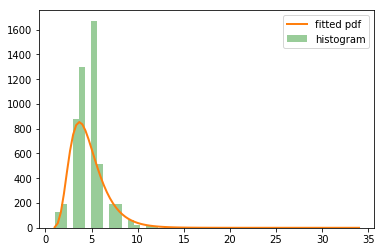

In [8]:
# NumberOfSections 컬럼 히스토그램 그리기 -------------------
# 히스토그램을 그린다
count, bins, ignored = plt.hist(data, 50, facecolor='g', histtype = 'stepfilled', alpha=0.4, label='histogram')

# 위 히스토그램에 맞는 가우시안 확률밀도함수를 그려본다 ---------------
# 데이터를 정규분포화 해준다. estimateGaussian() 함수와 똑같은 기능을 가지고 있다
shape, loc, scale = stats.lognorm.fit(data, floc= 0)
x_fit = np.linspace(data.min(), data.max(), 100)
# 확률밀도함수 데이터를 반환한다
data_fit = stats.lognorm.pdf(x_fit, shape, loc=loc, scale=scale)

# area_hist
area_hist = ((bins[1:] - bins[:-1]) * count).sum()
plt.plot(x_fit, data_fit * area_hist, label = "fitted pdf", linewidth = 2)
plt.legend()


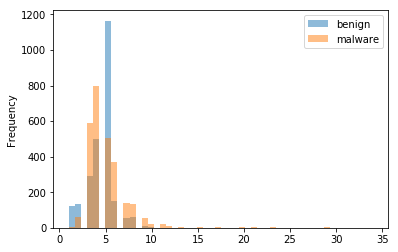

In [12]:
# 정상파일과 악성파일을 분류한다
benign = df.loc[df['class'] == 0]
malware = df.loc[df['class'] == 1]

# NumberOfSections 데이터만 따로 추출한 다음
d_first = benign['NumberOfSections']
d_second = malware['NumberOfSections']

# 두 데이터를 하나로 묶은 다음 히스토그램을 그린다
df_hist = pd.DataFrame({'benign':d_first, 'malware':d_second}, columns=['benign', 'malware'] )
df_hist.plot(kind='hist', bins=50, alpha = 0.5)

/home/virtualenv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/virtualenv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/virtualenv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a sing

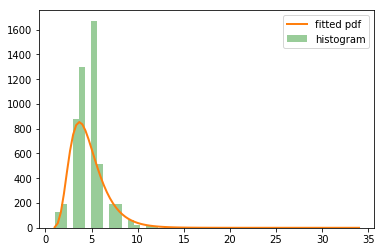

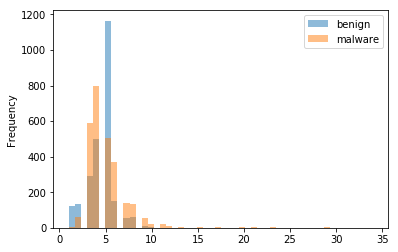

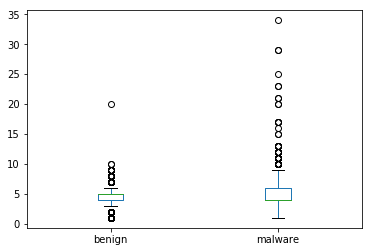

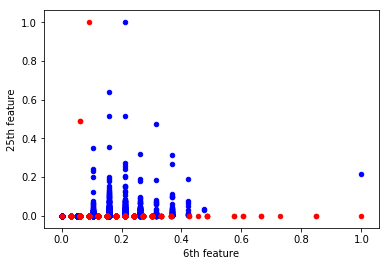

In [11]:
sec = df['NumberOfSections']


def hist_pdf(d_first, d_second=pd.Series(), col=None):
    # make a fit to the data
    
    if(d_second.empty):
        shape, loc, scale = stats.lognorm.fit(sec, floc=0)
        x_fit = np.linspace(sec.min(), sec.max(), 100)
        sec_fit = stats.lognorm.pdf(x_fit, shape, loc=loc, scale=scale)

        count, bins, ignored = plt.hist(sec, 50, facecolor='g', histtype='stepfilled', alpha=0.4, label='histogram')

        # calculate area of histogram (area under PDF should be 1)
        area_hist = ((bins[1:] - bins[:-1]) * count).sum()

        plt.plot(x_fit, sec_fit*area_hist, label='fitted pdf', linewidth=2)
        plt.legend()
    else:
    
        d_first = d_first[[col]].stack()
        d_second = d_second[[col]].stack()

        
        df_hist = pd.DataFrame({'benign': d_first, 'malware': d_second}, columns=['benign', 'malware'])        
        plt.figure()
        df_hist.plot(kind='hist', bins=50, alpha=0.5)

        
def box_plot(d_first, d_second, col):
    
    d_first = d_first[[col]].stack()
    d_second = d_second[[col]].stack()

    df_box = pd.DataFrame({'benign': d_first, 'malware': d_second}, columns=['benign', 'malware'])        
    plt.figure()
    df_box.plot(kind='box')

def feature_normalize(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu)/sigma
    
def scatter_plot(d_first, d_second, x, y):
    
    min_max_scaler = preprocessing.MinMaxScaler()
    
    benign_x = d_first[[x]].stack()
    benign_y = d_first[[y]].stack()
    
    benign_x = np.array(benign_x, dtype='float64')
    benign_y = np.array(benign_y, dtype='float64')
    
    benign_x = min_max_scaler.fit_transform(benign_x)
    benign_y = min_max_scaler.fit_transform(benign_y)
    
    
    # dataframe -> series : stack()
    # series -> dataframe: unstack()
    # series -> nparray : np.array(data)
    
    malware_x = d_second[[x]].stack()
    malware_y = d_second[[y]].stack()
    
    malware_x = np.array(malware_x, dtype='float64')
    malware_y = np.array(malware_y, dtype='float64')
    
    malware_x = min_max_scaler.fit_transform(malware_x)
    malware_y = min_max_scaler.fit_transform(malware_y)
    
    df = pd.DataFrame({'benign_y': benign_y, 'benign_x': benign_x }, columns=['benign_y', 'benign_x'])        
    ax = df.plot(kind='scatter', x='benign_x', y='benign_y', color='Blue')
    
    df = pd.DataFrame({'malware_y': malware_y, 'malware_x': malware_x }, columns=['malware_y', 'malware_x'])        
    bx = df.plot(kind='scatter', x='malware_x', y='malware_y', color='Red', ax=ax)
    
    bx.set_xlabel(str(x) + 'th feature')
    bx.set_ylabel(str(y) + 'th feature')

hist_pdf(sec)
hist_pdf(benign, malware, 6)
box_plot(benign, malware, 6)
scatter_plot(benign, malware, 6, 25)